In [1]:
# Import all libraries regarding torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde, lognorm
import os
from torch.utils.data import Dataset, DataLoader
import time

In [2]:
# Reading from RSA_input.csv
df = pd.read_csv('RSA_input.csv')
grain_R = df["grain_R"]
grain_asp = df["grain_asp"]
print(len(grain_R)) # length 30218
print(len(grain_asp)) # length 30218

# Combined into numpy shape (30218, 2)
grainsData = np.column_stack((grain_R, grain_asp))
print(grainsData.shape)

30218
30218
(30218, 2)


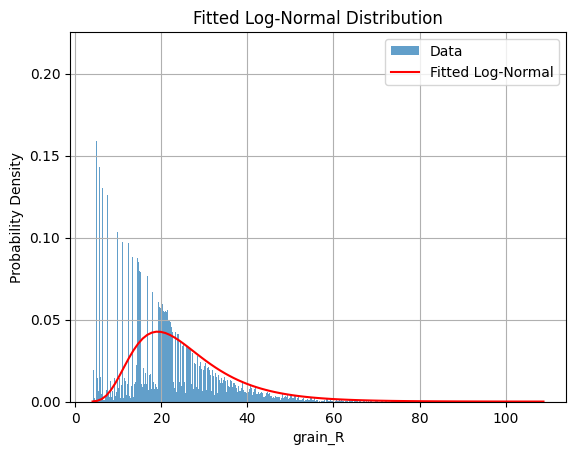

In [3]:

# Compute the histogram of grain_R
counts, bin_edges = np.histogram(grain_R, bins=10, density=True)

# Create the histogram plot
plt.hist(grain_R, bins=1000, density=True, alpha=0.7, label='Data')

# Fit a log-normal distribution to the data
params = lognorm.fit(grain_R)

# Extract the parameters
sigma = params[0]
mu = np.log(params[2])

# Generate x values for the plot
x = np.linspace(min(grain_R), max(grain_R), 100)

# Compute the fitted log-normal PDF
pdf = lognorm.pdf(x, s=sigma, loc=0, scale=np.exp(mu))

# Plot the fitted log-normal PDF
plt.plot(x, pdf, 'r-', label='Fitted Log-Normal')

plt.xlabel('grain_R')
plt.ylabel('Probability Density')
plt.title('Fitted Log-Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()

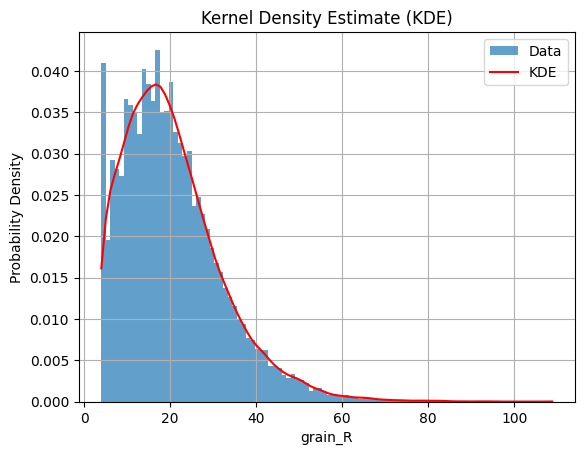

In [4]:
# Create the histogram plot
plt.hist(grain_R, bins=100, density=True, alpha=0.7, label='Data')

# Fit a KDE to the data
kde = gaussian_kde(grain_R)

# Generate x values for the plot
x = np.linspace(min(grain_R), max(grain_R), 100)

# Compute the KDE values
kde_values = kde(x)

# Plot the KDE
plt.plot(x, kde_values, 'r-', label='KDE')

plt.xlabel('grain_R')
plt.ylabel('Probability Density')
plt.title('Kernel Density Estimate (KDE)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plots of the dependencies

Text(0.5, 1.0, 'GAN generated grain_R and grain_asp')

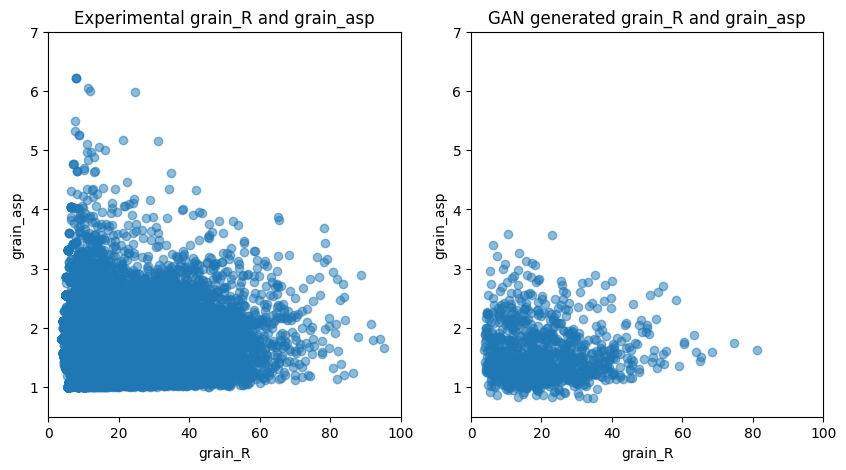

In [48]:
# Plot 2 subfigures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

epoch = 120
grains = 1

df = pd.read_csv('RSA_input.csv')
exp_grain_R = df["grain_R"]
exp_grain_asp = df["grain_asp"]

generated_data = pd.read_csv(f'downsampled_grains/epoch_{epoch}/grains_{grains}.csv')
generated_grain_R = generated_data["grain_R"]
generated_grain_asp = generated_data["grain_asp"]
# Plot scatterplot 
ax1.scatter(exp_grain_R, exp_grain_asp, alpha=0.5)
ax1.set_xlabel('grain_R')
ax1.set_ylabel('grain_asp')
ax1.set_xlim([0, 100])
ax1.set_ylim([0.5, 7])
ax1.set_title('Experimental grain_R and grain_asp')

# Plot scatterplot
ax2.scatter(generated_grain_R, generated_grain_asp, alpha=0.5)
ax2.set_xlabel('grain_R')
ax2.set_ylabel('grain_asp')
ax2.set_xlim([0, 100])
ax2.set_ylim([0.5, 7])
ax2.set_title('GAN generated grain_R and grain_asp')

0        2.785437
1        4.639141
2        1.504893
3        2.147900
4        3.167250
           ...   
30213    1.949763
30214    2.652249
30215    1.450060
30216    1.394898
30217    1.278624
Name: grain_asp, Length: 30218, dtype: float64


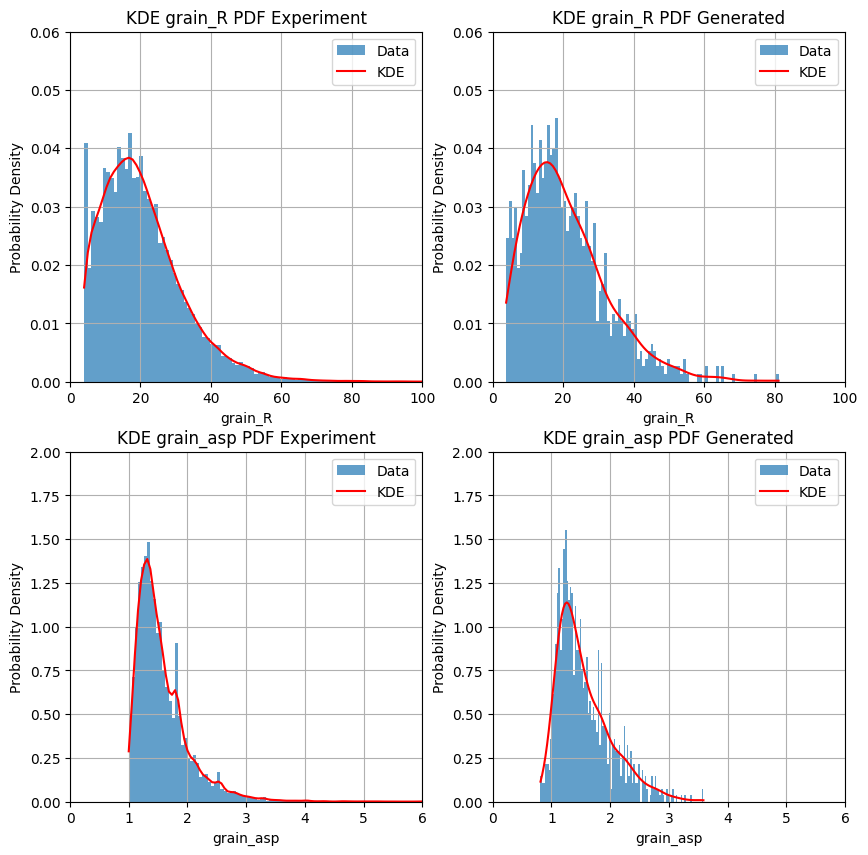

In [41]:
# Plot 2x2 subfigures
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

epoch = 120
grains = 1
generated_data = pd.read_csv(f'downsampled_grains/epoch_{epoch}/grains_{grains}.csv')
generated_grain_R = generated_data["grain_R"]
generated_grain_asp = generated_data["grain_asp"]

# Reading from RSA_input.csv
df = pd.read_csv('RSA_input.csv')
exp_grain_R = df["grain_R"]
exp_grain_asp = df["grain_asp"]

print(exp_grain_asp)
# Generate x values for the plot


# Fit a KDE to the data
exp_grain_R_KDE = gaussian_kde(exp_grain_R)
exp_grain_R_KDE_x = np.linspace(min(exp_grain_R), max(exp_grain_R), 100)
exp_grain_R_KDE_y = exp_grain_R_KDE(exp_grain_R_KDE_x)

generated_grain_R_KDE = gaussian_kde(generated_grain_R)
generated_grain_R_KDE_x = np.linspace(min(generated_grain_R), max(generated_grain_R), 100)
generated_grain_R_KDE_y = generated_grain_R_KDE(generated_grain_R_KDE_x)

exp_grain_asp_KDE = gaussian_kde(exp_grain_asp)
exp_grain_asp_KDE_x = np.linspace(min(exp_grain_asp), max(exp_grain_asp), 100)
exp_grain_asp_KDE_y = exp_grain_asp_KDE(exp_grain_asp_KDE_x)

generated_grain_asp_KDE = gaussian_kde(generated_grain_asp)
generated_grain_asp_KDE_x = np.linspace(min(generated_grain_asp), max(generated_grain_asp), 100)
generated_grain_asp_KDE_y = generated_grain_asp_KDE(generated_grain_asp_KDE_x)

ax1.hist(exp_grain_R, bins=100, density=True, alpha=0.7, label='Data')
ax1.plot(exp_grain_R_KDE_x, exp_grain_R_KDE_y, 'r-', label='KDE')
ax1.set_xlabel('grain_R')
ax1.set_ylabel('Probability Density')
ax1.set_title('KDE grain_R PDF Experiment')
ax1.set_xlim([0, 100])
ax1.set_ylim([0, 0.06])
ax1.legend()
ax1.grid(True)

ax2.hist(generated_grain_R, bins=100, density=True, alpha=0.7, label='Data')
ax2.plot(generated_grain_R_KDE_x, generated_grain_R_KDE_y, 'r-', label='KDE')
ax2.set_xlabel('grain_R')
ax2.set_ylabel('Probability Density')
ax2.set_title('KDE grain_R PDF Generated')
ax2.set_xlim([0, 100])
ax2.set_ylim([0, 0.06])
ax2.legend()
ax2.grid(True)

ax3.hist(exp_grain_asp, bins=100, density=True, alpha=0.7, label='Data')
ax3.plot(exp_grain_asp_KDE_x, exp_grain_asp_KDE_y, 'r-', label='KDE')
ax3.set_xlabel('grain_asp')
ax3.set_ylabel('Probability Density')
ax3.set_title('KDE grain_asp PDF Experiment')
ax3.set_xlim([0, 6])
ax3.set_ylim([0, 2])
ax3.legend()
ax3.grid(True)

ax4.hist(generated_grain_asp, bins=100, density=True, alpha=0.7, label='Data')
ax4.plot(generated_grain_asp_KDE_x, generated_grain_asp_KDE_y, 'r-', label='KDE')
ax4.set_xlabel('grain_asp')
ax4.set_ylabel('Probability Density')
ax4.set_title('KDE grain_asp PDF Generated')
ax4.set_xlim([0, 6])
ax4.set_ylim([0, 2])
ax4.legend()
ax4.grid(True)